In [1]:
%load_ext autoreload
%autoreload 2
from etr.auto_import import *
from etr.data.data_loader import load_data

## Data

In [2]:
trade = pd.concat([
    load_data(["2025-05-01", "2025-05-19"], table="MarketTrade", venue="*", symbol="XRPJPY"),
    load_data(["2025-05-01", "2025-05-19"], table="MarketTrade", venue="*", symbol="XRPUSD"),
])
trade["term_amount"] = trade.amount * trade.price / 1e6
trade["latency"] = (trade["timestamp"] - trade.market_created_timestamp).dt.total_seconds() * 1e3

2025-05-19 15:20:24.740|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 67 HDB files, process loading...
100%|██████████| 67/67 [00:00<00:00, 97.43it/s] 
2025-05-19 15:20:25.696|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 17 HDB files, process loading...
100%|██████████| 17/17 [00:00<00:00, 208.27it/s]


In [3]:
rate = pd.concat([
    load_data(["2025-05-01", "2025-05-19"], table="Rate", venue="*", symbol="USDJPY"),
    load_data(["2025-05-01", "2025-05-19"], table="Rate", venue="*", symbol="XRPJPY"),
    load_data(["2025-05-01", "2025-05-19"], table="Rate", venue="*", symbol="XRPUSD"),
])

2025-05-19 15:20:33.74 |INFO    |etr.data.data_loader: data_loader.load_data 85|Found 14 HDB files, process loading...
100%|██████████| 14/14 [00:01<00:00, 13.07it/s]
2025-05-19 15:20:34.560|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 67 HDB files, process loading...
100%|██████████| 67/67 [00:01<00:00, 33.71it/s]
2025-05-19 15:20:37.375|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 17 HDB files, process loading...
100%|██████████| 17/17 [00:01<00:00,  9.25it/s]


In [4]:
rate.head(3)

,timestamp,market_created_timestamp,sym,venue,category,best_bid,best_ask,mid_price,misc,universal_id
0,2025-05-01 00:00:00.024862+00:00,2025-05-01 00:00:00.015000+00:00,USDJPY,gmo,websocket,142.978,143.066,143.022,OPEN,c1442b47e96640b5b7db36b1766d8ced
1,2025-05-01 00:00:00.325752+00:00,2025-05-01 00:00:00.317000+00:00,USDJPY,gmo,websocket,142.976,143.064,143.020,OPEN,bcf973f009da4426b55240942ecea07c
2,2025-05-01 00:00:00.627216+00:00,2025-05-01 00:00:00.618000+00:00,USDJPY,gmo,websocket,142.978,143.066,143.022,OPEN,54407e33cd77421a95d9f5aa7fb730ff


In [5]:
trade.head(3)

,timestamp,market_created_timestamp,sym,venue,category,side,price,amount,trade_id,order_ids,misc,universal_id,term_amount,latency
0,2025-05-01 00:00:07.967444+00:00,2025-05-01 00:00:07.907000+00:00,XRPJPY,bitflyer,json-rpc,1,313.93,0.01,2595104569,JRF20250501-000007-444975_JRF20250501-000005-0...,None,cc0390edcec241639e3fd47a7b8ddce7,0.000003,60.444
1,2025-05-01 00:00:20.250433+00:00,2025-05-01 00:00:20.193000+00:00,XRPJPY,bitflyer,json-rpc,1,313.93,0.01,2595104584,JRF20250501-000020-448575_JRF20250501-000008-0...,None,e28e17ca1bc04738903100329fddb30d,0.000003,57.433
2,2025-05-01 00:00:33.613495+00:00,2025-05-01 00:00:33.538000+00:00,XRPJPY,bitflyer,json-rpc,1,313.89,0.01,2595105605,JRF20250501-000033-452175_JRF20250501-000024-0...,None,674d42276e9241e58b86aa6443a647bb,0.000003,75.495


---

### best spread

In [6]:
rate["spread"] = (rate.best_ask - rate.best_bid) / rate.mid_price * 1e4

In [7]:
rate.groupby(["venue", "sym"]).spread.describe().sort_values("mean")

,,count,mean,std,min,25%,50%,75%,max
venue,sym,,,,,,,,
bitbank,XRPJPY,759911.0,0.911575,3.623566,-320.844441,0.062223,0.591987,1.399052,54.999395
gmo,USDJPY,3386117.0,1.061355,2.113948,0.134546,0.137410,0.139102,0.278991,7.913913
coincheck,XRPJPY,235169.0,3.309043,10.144238,-57.987575,-1.564667,3.805491,9.683959,221.743858
bitmex,XRPUSD,4520786.0,4.109591,2.248179,0.377152,2.703068,3.649709,5.062864,116.572838
gmo,XRPJPY,2087859.0,5.636799,1.825490,0.025780,4.620746,5.850382,6.753250,45.170036
bitflyer,XRPJPY,1701746.0,9.473193,5.193874,-1432.683609,6.014176,8.977311,12.248702,89.926164


In [8]:
rate.groupby(["venue", "sym", rate.timestamp.dt.hour]).spread.median().unstack(level=[0, 1]).style.bar()

In [9]:
v = trade.set_index("market_created_timestamp").groupby(["venue", "sym"]).resample("10min").amount.sum().unstack(level=[0, 1])
c = trade.set_index("market_created_timestamp").groupby(["venue", "sym"]).resample("10min").amount.count().unstack(level=[0, 1])

In [10]:
display(
    "Volume",
    v.describe().T,
    "Count",
    c.describe().T,
)

'Volume'

,,count,mean,std,min,25%,50%,75%,max
venue,sym,,,,,,,,
bitbank,XRPJPY,2448.0,67862.925119,101482.131293,0.0,17299.591300,38439.766200,76551.557450,1.705144e+06
bitflyer,XRPJPY,2448.0,17853.042832,28270.581041,0.0,3105.615271,8361.771456,20538.906775,4.131525e+05
bitmex,XRPUSD,2448.0,17582.007068,43769.028325,0.0,1453.279645,4836.777925,15471.198843,8.130138e+05
coincheck,XRPJPY,2213.0,9151.983737,18119.540411,0.0,809.470000,3589.600000,10183.630000,2.264189e+05
gmo,XRPJPY,2364.0,58933.257191,79742.774935,0.0,18422.500000,34230.000000,68512.500000,9.881300e+05


'Count'

,,count,mean,std,min,25%,50%,75%,max
venue,sym,,,,,,,,
bitbank,XRPJPY,2448.0,153.193219,160.439707,0.0,66.00,113.0,185.25,2191.0
bitflyer,XRPJPY,2448.0,160.842320,86.162493,0.0,102.75,142.0,194.00,1041.0
bitmex,XRPUSD,2448.0,50.696487,165.195355,0.0,6.00,16.0,40.00,3819.0
coincheck,XRPJPY,2213.0,27.639855,37.029886,0.0,7.00,17.0,35.00,425.0
gmo,XRPJPY,2364.0,238.265651,312.695886,0.0,72.00,133.0,253.25,2157.0


---

### Deviation

preprocessing

In [11]:
# best price
best = rate.set_index("timestamp").groupby(["venue", "sym"])[["best_bid", "best_ask"]].resample("5s").last().unstack(level=[0, 1])
best = best.swaplevel(0, -1, axis=1).swaplevel(0, 1, axis=1)

In [12]:
# traded price
tprice = trade.set_index("market_created_timestamp").groupby(["venue", "sym"]).price.resample("5s", label="right").last().unstack(level=[0, 1])

In [13]:
# exec price
exec_price = trade.set_index("market_created_timestamp").shift(freq="-100ms").groupby(["venue", "sym", "side"]).price.resample("5s").agg(["min", "max"])
exec_price = exec_price.unstack(level=[0, 1, 2]).swaplevel(0, -1, axis=1)
sell = exec_price.loc[:, ix[-1, :, :, "min"]][-1]
sell.columns = ["sell_"+"_".join(c[:1]) for c in sell.columns]

buy = exec_price.loc[:, ix[1, :, :, "max"]][1]
buy.columns = ["buy_"+"_".join(c[:1]) for c in buy.columns]
exec_price = buy.join(sell)

In [16]:
# mid prices
mid = rate.set_index(["timestamp"]).groupby(["venue", "sym"]).mid_price.resample("5s", label="right").last().unstack(level=[0, 1]).ffill()
mid[("bitmex", "XRPJPY")] = mid.bitmex.XRPUSD * mid.gmo.USDJPY
mid = mid.drop([("gmo", "USDJPY"), ("bitmex", "XRPUSD"), ("bitbank", "XRPJPY")], axis=1)
mid.columns = mid.columns.get_level_values(0)
mid = mid.mask(mid.div(mid.rolling("10min").mean()).sub(1).abs().ge(0.03), np.nan).ffill()

In [17]:
mid.head(3)

venue,bitflyer,coincheck,gmo,bitmex
timestamp,,,,
2025-05-01 00:00:05+00:00,313.815,NaN,NaN,313.642860
2025-05-01 00:00:10+00:00,313.810,NaN,NaN,313.631323
2025-05-01 00:00:15+00:00,313.825,NaN,NaN,313.651632


In [18]:
# deviation -- from globa mid
global_mid = mid.mean(axis=1).to_frame("mid")
dev = mid.div(global_mid.values).sub(1).mul(1e4)
dev.describe().T

,count,mean,std,min,25%,50%,75%,max
venue,,,,,,,,
bitflyer,293760.0,3.166322,6.083172,-74.024886,-0.197245,3.236124,6.844226,42.446626
coincheck,265528.0,5.645489,9.285347,-68.938000,0.055890,6.079181,11.713412,93.049880
gmo,283597.0,-5.801353,11.756387,-82.688663,-11.301096,-5.889450,-1.140482,208.550468
bitmex,293760.0,-2.668600,8.326929,-90.902588,-7.659288,-3.286231,2.316457,43.021233


In [19]:
# deviation MA
freq = "10min"
dev_ma = dev.rolling(freq).mean()
dev_smooth = dev - dev_ma
dev_smooth.describe().T

,count,mean,std,min,25%,50%,75%,max
venue,,,,,,,,
bitflyer,293760.0,0.000319,3.001372,-76.102449,-1.681144,-0.018087,1.692296,60.106363
coincheck,265528.0,-0.002511,5.819949,-31.719269,-3.699774,0.051377,3.667443,83.218664
gmo,283597.0,0.001617,3.760660,-158.635434,-1.728790,0.000387,1.724394,49.071484
bitmex,293760.0,-0.000854,3.004142,-26.513485,-1.771495,-0.005848,1.759219,50.995796


In [20]:
dev_smooth.abs().quantile(q=0.95).to_frame().T

venue,bitflyer,coincheck,gmo,bitmex
0.95,5.461636,11.535479,5.985617,5.78711


In [21]:
# 10min return
theta = dev_smooth.abs().quantile(q=0.95)
sig = (dev_smooth.abs() > theta).mul(np.sign(dev_smooth)).stack().to_frame("signal").query("signal != 0").mul(-1)
display(
    theta.to_frame().T,
    sig.join(mid.shift(-12*10).div(mid).sub(1).mul(1e4).stack().to_frame("ret_10min")).groupby(["venue", "signal"]).ret_10min.describe()
)

venue,bitflyer,coincheck,gmo,bitmex
0.95,5.461636,11.535479,5.985617,5.78711


count       mean        std         min        25%  \
venue     signal                                                        
bitflyer  -1.0    7374.0  -1.917242  39.112802 -309.313586 -21.956517   
           1.0    7314.0   3.136800  39.690589 -279.465024 -18.165477   
bitmex    -1.0    7123.0  -0.198680  44.878143 -301.913086 -23.274755   
           1.0    7565.0  -0.268911  43.766377 -311.870415 -24.686820   
coincheck -1.0    6533.0 -19.239930  44.358360 -314.639078 -39.373245   
           1.0    6744.0  16.424177  37.724669 -258.233927  -2.849137   
gmo       -1.0    7320.0   1.489088  34.359898 -245.601616  -8.818735   
           1.0    6860.0  -1.412422  48.716653 -326.699588 -19.437649   

                        50%        75%         max  
venue     signal                                    
bitflyer  -1.0    -0.779230  18.538984  232.800227  
           1.0     4.223520  25.562928  234.187919  
bitmex    -1.0     1.928351  21.351662  232.133125  
           1.0     0.524314  24.214605  235.046435  
coincheck -1.0   -17.945143   2.939834  220.507613  
           1.0    16.747923  37.089960  240.195779  
gmo       -1.0     0.000000  16.867955  177.611219  
           1.0     0.000000  18.682383  257.360048

- dev := (mid - global_mid)
- dev_ma = Rolling(dev)
- dev_smooth = dev - dev_ma
- dev_smooth > 5bps => short
- dev_smooth < -5bps => long

<Axes: >

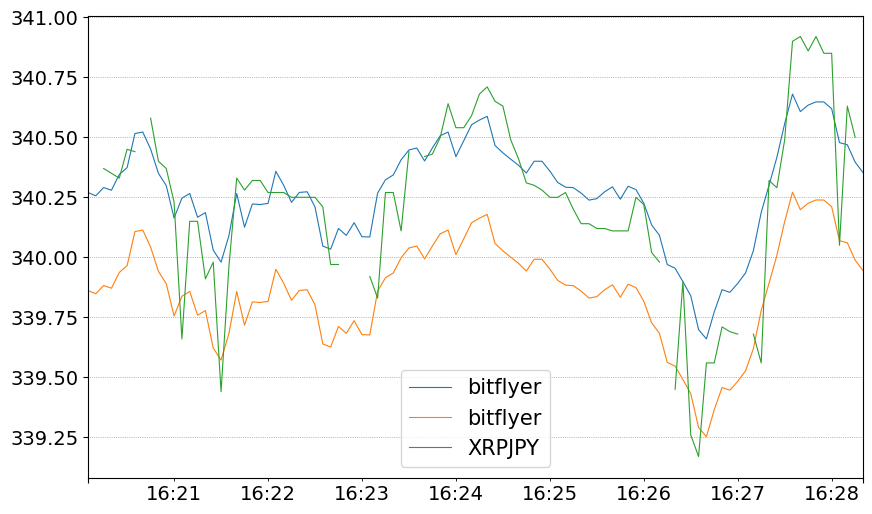

In [25]:
# pricing example
venue = "bitflyer"
offset = 6
ask = (dev_ma + offset).div(1e4).add(1).mul(global_mid.values)
bid = (dev_ma - offset).div(1e4).add(1).mul(global_mid.values)
pd.concat([
    ask[venue],
    bid[venue],
    tprice[venue],
], axis=1).iloc[150000:150000+100].plot()

### GMO

In [27]:
# concolidate
venue = "gmo"
offset = 4
ask = (dev_ma + offset).div(1e4).add(1).mul(global_mid.values)
bid = (dev_ma - offset).div(1e4).add(1).mul(global_mid.values)
data = pd.concat([
    ask[venue].rename("ask"),
    bid[venue].rename("bid"),
    mid[venue].rename("mid"),
    exec_price[[f"buy_{venue}", f"sell_{venue}"]].set_axis(["buy", "sell"], axis=1),
    best[venue].XRPJPY.set_axis(["best_bid", "best_ask"], axis=1),
    dev_ma[venue].to_frame("dev_ma"),
    dev_smooth[venue].to_frame("dev_smooth"),
    global_mid.mid.pct_change().rolling(freq).std().mul(np.sqrt(12 * 1440 * 365) * 100).to_frame("vol"),
    np.sign((global_mid.mid - global_mid.mid.rolling(freq).mean())).rename("ma_sign"),
], axis=1)
# data.head(3)

In [28]:
data.vol.describe().to_frame("vol").T

,count,mean,std,min,25%,50%,75%,max
vol,293758.0,42.192975,26.264121,6.900791,26.172825,35.21737,49.851051,270.7538


In [62]:
# run simulation
pos = 0
exit_spread = 5
vol_threshold = 30
horizon = 12 * 8
transactions = []
stop_loss = 20
tp_level = 20
for i, (t, row) in tqdm(enumerate(data.iterrows())):
    if pos != 0:
        # LIMIT
        if pos > 0:
            price = row.mid * (1 + exit_spread / 1e4)
            # price = transactions[-1][-2] * (1 + exit_spread / 1e4)  # Profit target pricing
            if price < row.buy:
                pos = 0
                transactions.append([i, t, -1, price, "limit"])
        elif pos < 0:
            price = row.mid * (1 - exit_spread / 1e4)
            # price = transactions[-1][-2] * (1 - exit_spread / 1e4)  # Profit target pricing
            if price > row.sell:
                pos = 0
                transactions.append([i, t, +1, price, "limit"])
        
        # SL
        if pos != 0 and pos * (row.mid / transactions[-1][-2] - 1) * 1e4 < -stop_loss:
            pos = 0
            price = row.best_bid if pos > 0 else row.best_ask
            transactions.append([i, t, pos * -1, price, "sl"])
            
        # TP
        price = row.best_bid if pos > 0 else row.best_ask
        if pos != 0 and pos * (price / transactions[-1][-2] - 1) * 1e4 > tp_level:
            pos = 0
            transactions.append([i, t, pos * -1, price, "tp"])
        
        # HORIZON
        if pos != 0 and transactions[-1][0] + horizon < i:
            pos = 0
            price = row.best_bid if pos > 0 else row.best_ask
            transactions.append([i, t, pos * -1, price, "market"])
    else:
        if row.ask < row.buy and row.vol < vol_threshold and row.dev_ma > 0 and row.ma_sign < 0:
            pos -= 1
            transactions.append([i, t, -1, row.ask, "limit"])
        if row.sell < row.bid and row.vol < vol_threshold and row.dev_ma  < 0 and row.ma_sign > 0:
            pos += 1
            transactions.append([i, t, +1, row.bid, "limit"])
            
# form results table
trs = pd.DataFrame(transactions, columns=["i", "time", "side", "price", "order"])
trs = pd.concat([
    trs.iloc[::2].reset_index(drop=True).rename(lambda x: f"entry_{x}", axis=1),
    trs.iloc[1::2].reset_index(drop=True).rename(lambda x: f"exit_{x}", axis=1),
], axis=1)

trs["pl"] = (trs.exit_price/trs.entry_price).sub(1).mul(1e4).mul(trs.entry_side)

0it [00:00, ?it/s]

In [63]:
trs.pl.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
pl,483.0,1.564426,11.993939,-39.115487,-4.5168,3.573133,9.357646,25.665719


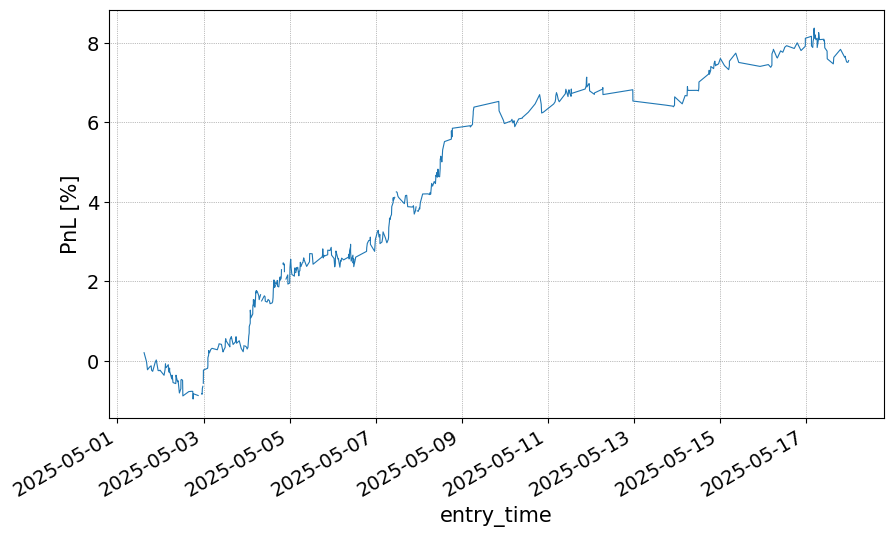

In [75]:
trs.set_index("entry_time").pl.cumsum().div(1e2).plot(ylabel="PnL [%]");

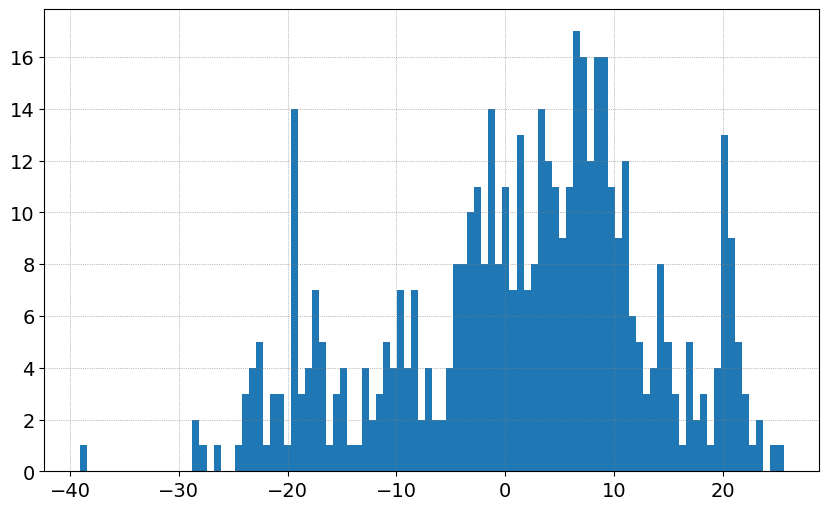

In [65]:
trs.pl.hist(bins=100);

In [66]:
trs.groupby("entry_side").pl.describe()

,count,mean,std,min,25%,50%,75%,max
entry_side,,,,,,,,
-1,54.0,-2.473478,13.575914,-39.115487,-9.802301,-0.358083,7.534476,23.260014
1,429.0,2.072693,11.698954,-28.590864,-4.082777,3.864639,9.448991,25.665719


In [67]:
trs.groupby(["entry_order", "exit_order"]).pl.describe()

count       mean       std        min        25%  \
entry_order exit_order                                                     
limit       limit       276.0   5.155060  8.141682 -15.443049  -0.194739   
            market      128.0   1.642769  9.042009 -19.291618  -3.644706   
            sl           61.0 -20.479280  4.001741 -39.115487 -22.759818   
            tp           18.0  20.654590  0.514006  20.039256  20.235481   

                              50%        75%        max  
entry_order exit_order                                   
limit       limit        6.167458   9.981273  25.665719  
            market       1.153527   8.140387  24.938288  
            sl         -19.510422 -18.134616 -14.932448  
            tp          20.534703  20.970187  21.919681

In [68]:
trs.groupby(trs.entry_time.dt.hour).pl.describe().style.bar(subset=["mean"])

,count,mean,std,min,25%,50%,75%,max
entry_time,,,,,,,,
0,16.000000,3.876882,10.164675,-21.737092,-2.357169,6.009878,10.595109,15.933848
1,14.000000,3.468857,14.387862,-21.030541,-8.998824,8.159714,11.761217,22.486911
2,22.000000,2.713912,14.602266,-22.837607,-8.774260,6.225253,13.625197,25.665719
3,25.000000,1.863920,10.779414,-24.090690,-3.052416,3.998578,7.708350,20.987802
4,28.000000,2.160661,11.284877,-18.154165,-6.465070,5.135030,7.882949,21.264790
5,39.000000,2.565627,9.371502,-21.454460,-1.589313,2.658977,9.441156,21.297280
6,24.000000,-0.778645,11.484187,-23.159722,-9.933627,0.004529,6.676025,20.179413
7,22.000000,3.652188,12.663196,-20.337529,-3.551911,6.575915,10.997438,24.938288
8,14.000000,5.961253,9.751404,-15.579261,-0.232516,7.672429,11.516486,20.404624


In [69]:
trs.set_index("entry_time").between_time(datetime.time(0), datetime.time(6)).pl.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
pl,144.0,2.621223,11.324528,-24.09069,-3.78437,4.767824,9.514971,25.665719


<Axes: ylabel='PnL%'>

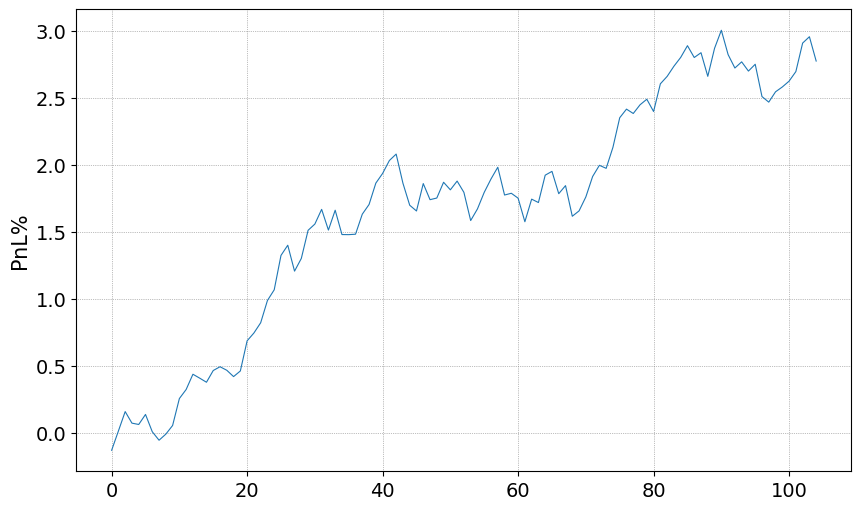

In [70]:
trs.set_index("entry_time").between_time(datetime.time(0), datetime.time(5)).pl.cumsum().div(1e2).reset_index(drop=True).plot(ylabel="PnL%")

In [71]:
trs.set_index("entry_time").between_time(datetime.time(0), datetime.time(5)).pl.resample("1d").sum().cumsum()

entry_time
2025-05-02 00:00:00+00:00     -5.446459
2025-05-03 00:00:00+00:00     49.368600
2025-05-04 00:00:00+00:00    147.911039
2025-05-05 00:00:00+00:00    187.861699
2025-05-06 00:00:00+00:00    171.855695
2025-05-07 00:00:00+00:00    191.260030
2025-05-08 00:00:00+00:00    235.110418
2025-05-09 00:00:00+00:00    238.285172
2025-05-10 00:00:00+00:00    239.750959
2025-05-11 00:00:00+00:00    288.864791
2025-05-12 00:00:00+00:00    283.615821
2025-05-13 00:00:00+00:00    283.615821
2025-05-14 00:00:00+00:00    286.912660
2025-05-15 00:00:00+00:00    272.204656
2025-05-16 00:00:00+00:00    269.919612
2025-05-17 00:00:00+00:00    277.396671
Freq: D, Name: pl, dtype: float64

### BF

In [76]:
# concolidate
venue = "bitflyer"
offset = 5
ask = (dev_ma + offset).div(1e4).add(1).mul(global_mid.values)
bid = (dev_ma - offset).div(1e4).add(1).mul(global_mid.values)
data = pd.concat([
    ask[venue].rename("ask"),
    bid[venue].rename("bid"),
    mid[venue].rename("mid"),
    exec_price[[f"buy_{venue}", f"sell_{venue}"]].set_axis(["buy", "sell"], axis=1),
    best[venue].XRPJPY.set_axis(["best_bid", "best_ask"], axis=1),
    dev_ma[venue].to_frame("dev_ma"),
    dev_smooth[venue].to_frame("dev_smooth"),
    global_mid.mid.pct_change().rolling(freq).std().mul(np.sqrt(12 * 1440 * 365) * 100).to_frame("vol"),
    np.sign((global_mid.mid - global_mid.mid.rolling(freq).mean())).rename("ma_sign"),
], axis=1)
# data.head(3)

In [77]:
data.vol.describe().to_frame("vol").T

,count,mean,std,min,25%,50%,75%,max
vol,293758.0,42.192975,26.264121,6.900791,26.172825,35.21737,49.851051,270.7538


In [84]:
# run simulation
pos = 0
exit_spread = 5
vol_threshold = 35
horizon = 12 * 8
transactions = []
stop_loss = 20
tp_level = 30
for i, (t, row) in tqdm(enumerate(data.iterrows())):
    if pos != 0:
        # LIMIT
        if pos > 0:
            price = row.mid * (1 + exit_spread / 1e4)
            # price = transactions[-1][-2] * (1 + exit_spread / 1e4)  # Profit target pricing
            if price < row.buy:
                pos = 0
                transactions.append([i, t, -1, price, "limit"])
        elif pos < 0:
            price = row.mid * (1 - exit_spread / 1e4)
            # price = transactions[-1][-2] * (1 - exit_spread / 1e4)  # Profit target pricing
            if price > row.sell:
                pos = 0
                transactions.append([i, t, +1, price, "limit"])
        
        # SL
        if pos != 0 and pos * (row.mid / transactions[-1][-2] - 1) * 1e4 < -stop_loss:
            pos = 0
            price = row.best_bid if pos > 0 else row.best_ask
            transactions.append([i, t, pos * -1, price, "sl"])
            
        # TP
        price = row.best_bid if pos > 0 else row.best_ask
        if pos != 0 and pos * (price / transactions[-1][-2] - 1) * 1e4 > tp_level:
            pos = 0
            transactions.append([i, t, pos * -1, price, "tp"])
        
        # HORIZON
        if pos != 0 and transactions[-1][0] + horizon < i:
            pos = 0
            price = row.best_bid if pos > 0 else row.best_ask
            transactions.append([i, t, pos * -1, price, "market"])
    else:
        if row.ask < row.buy and row.vol < vol_threshold and row.dev_ma > 0 and row.ma_sign < 0:
            pos -= 1
            transactions.append([i, t, -1, row.ask, "limit"])
        if row.sell < row.bid and row.vol < vol_threshold and row.dev_ma  < 0 and row.ma_sign > 0:
            pos += 1
            transactions.append([i, t, +1, row.bid, "limit"])
            
# form results table
trs = pd.DataFrame(transactions, columns=["i", "time", "side", "price", "order"])
trs = pd.concat([
    trs.iloc[::2].reset_index(drop=True).rename(lambda x: f"entry_{x}", axis=1),
    trs.iloc[1::2].reset_index(drop=True).rename(lambda x: f"exit_{x}", axis=1),
], axis=1)

trs["pl"] = (trs.exit_price/trs.entry_price).sub(1).mul(1e4).mul(trs.entry_side)

0it [00:00, ?it/s]

In [85]:
trs.pl.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
pl,1015.0,4.658888,13.581637,-60.587522,-1.623368,7.097655,12.169179,38.640526


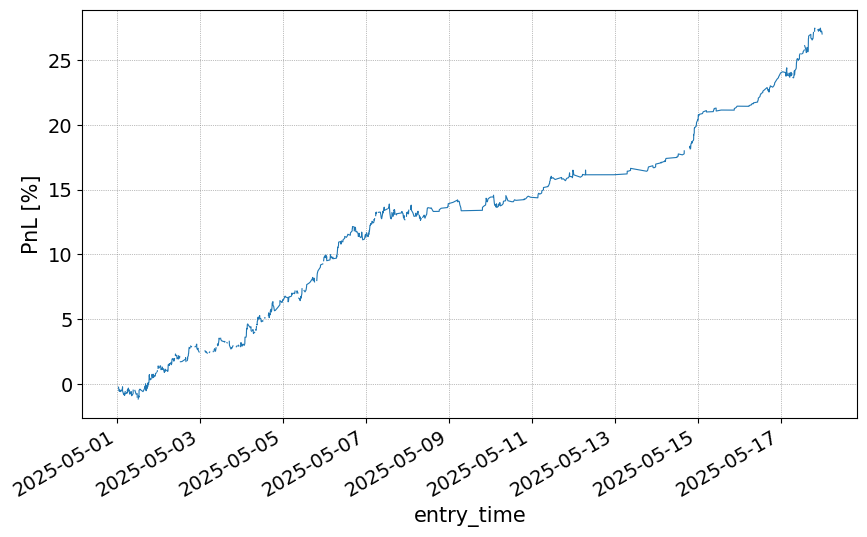

In [86]:
trs.set_index("entry_time").pl.sub(2).cumsum().div(1e2).plot(ylabel="PnL [%]");

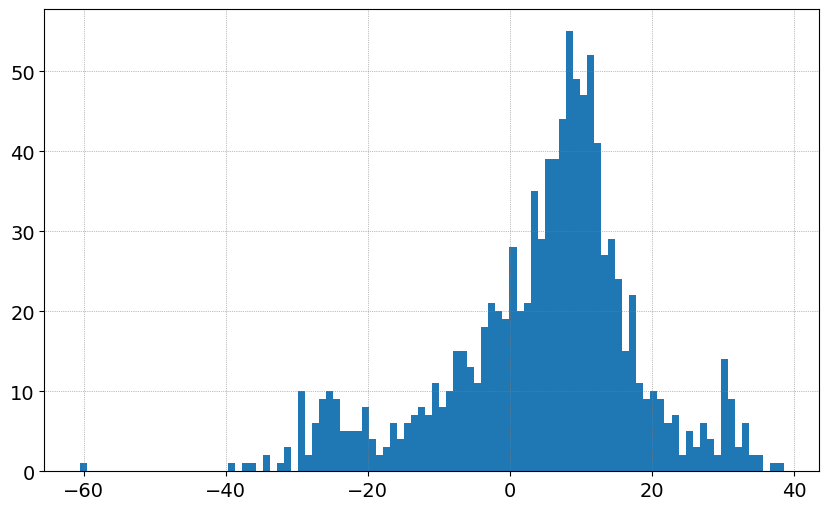

In [87]:
trs.pl.hist(bins=100);

In [88]:
trs.groupby("entry_side").pl.describe()

,count,mean,std,min,25%,50%,75%,max
entry_side,,,,,,,,
-1,886.0,4.357583,14.007511,-60.587522,-2.401748,6.880653,12.290633,38.640526
1,129.0,6.728315,9.986031,-22.498985,3.581453,8.365554,11.652144,33.331028


In [89]:
trs.groupby(["entry_order", "exit_order"]).pl.describe()

count       mean        std        min        25%  \
entry_order exit_order                                                      
limit       limit       650.0   8.703211   9.313592 -60.587522   4.081346   
            market      268.0   1.348541  10.774259 -25.822428  -6.214250   
            sl           76.0 -25.603914   4.728925 -39.552546 -28.745704   
            tp           21.0  31.246301   1.708434  30.175746  30.254268   

                              50%        75%        max  
entry_order exit_order                                   
limit       limit        9.018901  13.266588  38.640526  
            market       2.819200   8.875995  33.331028  
            sl         -25.540121 -22.860774 -15.675476  
            tp          30.638185  31.518013  37.443802

In [90]:
trs.groupby(trs.entry_time.dt.hour).pl.describe().style.bar(subset=["mean"])

,count,mean,std,min,25%,50%,75%,max
entry_time,,,,,,,,
0,32.000000,2.020373,16.274959,-27.351526,-10.985804,4.252043,13.653849,31.943778
1,42.000000,3.052968,14.778741,-34.262283,-5.833853,5.235404,12.328177,30.885833
2,45.000000,1.530939,12.906986,-29.568027,-4.273671,5.938077,9.344411,30.296714
3,60.000000,3.218921,12.963218,-29.203221,-2.252996,5.669537,11.200282,31.416408
4,42.000000,3.198407,11.151731,-25.013916,-4.544509,3.565072,10.629839,23.184750
5,62.000000,5.154157,10.584643,-29.472231,1.647461,6.194708,11.370371,32.017796
6,47.000000,1.128873,12.673900,-29.205880,-2.853064,6.354499,9.334542,20.142079
7,44.000000,6.347795,14.120683,-34.475391,1.817122,8.922773,14.322545,31.579974
8,48.000000,5.437184,14.647935,-37.088794,-0.093406,5.166919,13.168459,34.805973


In [91]:
trs.set_index("entry_time").between_time(datetime.time(0), datetime.time(6)).pl.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
pl,283.0,3.21129,12.875709,-34.262283,-3.114863,5.917258,11.291036,32.017796


<Axes: ylabel='PnL%'>

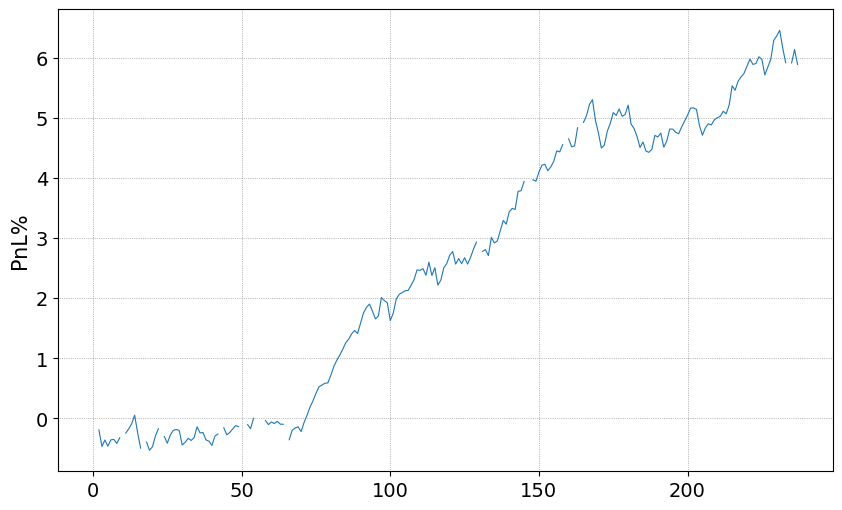

In [92]:
trs.set_index("entry_time").between_time(datetime.time(0), datetime.time(5)).pl.cumsum().div(1e2).reset_index(drop=True).plot(ylabel="PnL%")

In [93]:
trs.set_index("entry_time").between_time(datetime.time(0), datetime.time(5)).pl.resample("1d").sum().cumsum()

entry_time
2025-05-01 00:00:00+00:00    -30.240672
2025-05-02 00:00:00+00:00    -17.047915
2025-05-03 00:00:00+00:00     -9.704529
2025-05-04 00:00:00+00:00    165.757462
2025-05-05 00:00:00+00:00    246.497397
2025-05-06 00:00:00+00:00    257.000568
2025-05-07 00:00:00+00:00    455.880556
2025-05-08 00:00:00+00:00    478.041585
2025-05-09 00:00:00+00:00    502.989514
2025-05-10 00:00:00+00:00    476.195616
2025-05-11 00:00:00+00:00    514.405911
2025-05-12 00:00:00+00:00    471.408206
2025-05-13 00:00:00+00:00    471.408206
2025-05-14 00:00:00+00:00    507.222764
2025-05-15 00:00:00+00:00    589.319501
2025-05-16 00:00:00+00:00    590.799359
2025-05-17 00:00:00+00:00    589.237202
Freq: D, Name: pl, dtype: float64